**Arian Tashakkor - 40023494 (Coding section of the first ML4002 assignment)**
# Problem 1

###a. Sample generation and plotting

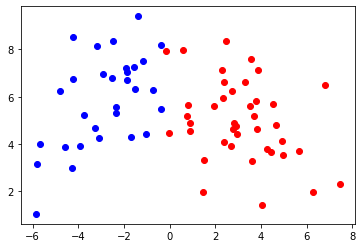

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Parameters of the Gaussian distributions
mu1 = [-3, 5]
sigma1 = [[2, 1], [1, 3]]
mu2 = [3, 5]
sigma2 = [[2, -1], [-1, 3]]

# Draw 30 samples from the first Gaussian and 40 samples from the second Gaussian
s1 = np.random.multivariate_normal(mu1, sigma1, 30)
s2 = np.random.multivariate_normal(mu2, sigma2, 40)

# Scatter plot of the drawn samples
plt.scatter(s1[:, 0], s1[:, 1], color='blue')
plt.scatter(s2[:, 0], s2[:, 1], color='red')
plt.show()

###b. Calculating probabilties

First we will define a function to calculate the multivariate pdf given x.

mvnpdf(x, mu, sigma): $$\frac{1}{\sqrt{(2\pi)^l |\Sigma|}}e^{(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x-\mu))} $$


In [2]:
def mvnpdf(x, mu, sigma):
  l = np.shape(x)[0]
  coeff = 1/(np.sqrt(((2*np.pi)**l)*np.linalg.det(sigma)))
  power = (-1/2)*np.transpose(x - mu)@np.linalg.inv(sigma)@(x - mu)
  return coeff*np.exp(power)

In [3]:
# P(C0) corresponding to s1
p = {}
p['C0'] = len(s1)/(len(s1) + len(s2))
print(f"P(C0): {p['C0']}")

# P(C1) corresponding to s2
p['C1'] = len(s2)/(len(s1) + len(s2))
print(f"P(C1): {p['C1']}")

# Conditional probabilties
p['X|C0'] = 0
for x in s1:
  p['X|C0'] += mvnpdf(x, mu1, sigma1)
p['X|C0'] = p['X|C0']/len(s1)
print(f"P(X|C0): {p['X|C0']}")

p['X|C1'] = 0
for x in s2:
  p['X|C1'] += mvnpdf(x, mu2, sigma2)
p['X|C1'] = p['X|C1']/len(s2)
print(f"P(X|C1): {p['X|C1']}")

# Likelihood of each sample individually
p['X'] = p['C0']*p['X|C0'] + p['C1']*p['X|C1']
print(f"P(X): {p['X']}")



P(C0): 0.42857142857142855
P(C1): 0.5714285714285714
P(X|C0): 0.02882003210967909
P(X|C1): 0.0320874048896758
P(X): 0.03068710226967721


We know that the MLE estimate for a presumed Gaussian distribution is:
$$\hat\mu = \frac{1}{N}\sum_{i=1}^{N}x_i, \hat\Sigma = \frac{1}{N}\sum_{i=1}^{N}(x_i - \hat\mu)(x_i - \hat\mu)^T$$

With this, we can model $P(X)$, $P(X|C0)$ and $P(X|C1)$ with Gaussian distributions.


In [4]:
# MLE for P(X)
mu_x = np.mean(np.vstack([s1, s2]), axis=0)
sigma_x = np.cov(np.vstack([s1, s2]), rowvar=False)

# MLE for P(X|C0)
mu_c0 = np.mean(s1, axis=0)
sigma_c0 = np.cov(s1, rowvar=False)

# MLE for P(X|C1)
mu_c1 = np.mean(s2, axis=0)
sigma_c1 = np.cov(s2, rowvar=False)

###c. Performing classification using MLE estimates


In [5]:
test1 = np.random.multivariate_normal(mu1, sigma1, 3)
test2 = np.random.multivariate_normal(mu2, sigma2, 3)

misclassifications = 0
print('Testing samples from class 1:')
for x in test1:
  # discriminant functions
  g0 = mvnpdf(x, mu_c0, sigma_c0)
  g1 = mvnpdf(x, mu_c1, sigma_c1)
  print(f'g0: {g0}, g1: {g1}')
  if g0 > g1:
    print('Correct classfication.')
  else:
    print('Misclassification.')
    misclassifications += 1
for x in test2:
  g0 = mvnpdf(x, mu_c0, sigma_c0)
  g1 = mvnpdf(x, mu_c1, sigma_c1)
  print(f'g0: {g0}, g1: {g1}')
  if g0 < g1:
    print('Correct classfication.')
  else:
    print('Misclassification.')
    misclassifications += 1  
print(f'Error rate: {misclassifications/6}')


Testing samples from class 1:
g0: 0.06018490454053954, g1: 0.00013208523022367966
Correct classfication.
g0: 0.0012097395130350182, g1: 6.385532062431545e-05
Correct classfication.
g0: 0.053708564430933026, g1: 0.00045760409537081673
Correct classfication.
g0: 8.469324814092037e-05, g1: 0.0272614276099637
Correct classfication.
g0: 1.0842934385362458e-13, g1: 0.014261643695561179
Correct classfication.
g0: 2.590996788905365e-09, g1: 0.03875598569273107
Correct classfication.
Error rate: 0.0


#Problem 2

In [6]:
!gdown --fuzzy https://drive.google.com/file/d/105XlHeD5I_nhA1DkCrhnmd-_ky3o7L3E/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=105XlHeD5I_nhA1DkCrhnmd-_ky3o7L3E
To: /content/data.zip
100% 15.1k/15.1k [00:00<00:00, 20.7MB/s]


In [7]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/data3/
  inflating: data/data3/data3_test.csv  
  inflating: data/data3/data3_train.csv  
  inflating: data/data3/data3_validation.csv  
   creating: data/data4/
  inflating: data/data4/data4_test.csv  
  inflating: data/data4/data4_train.csv  
  inflating: data/data4/data4_validation.csv  
  inflating: data/insurance.csv      


In the following sections, two cost functions will be employed in the Gradient Descent method. We will introduce both of them here.Note that we will augment the dataset with a column of 1's, indicating the bias feature ($x_0$).

We know that a linear regression is in the form of:
$$\hat y = \sum_{i=0}^{n}w_ix_i = w_0x_0 + w_1x_1 + \cdots + w_nx_n$$
Where $w_i$s depict the weights of the linear regression model.

- MSE (Mean Squared Error):
$$MSE=\frac{1}{n}\sum_{i=1}^{n}(\hat y_i - y_i)^2$$
Substituting $\hat y$ we have:
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(\sum_{j=0}^{m}w_jx_j^{(i)} - y_i)^2$$
In order to update each of the $w_k$s we need to take the derivative of this loss function w.r.t. to that $w_k$:
$$\frac{\partial(MSE)}{\partial w_k} = \frac{2}{n}\sum_{i=1}^{n}x_k^{(i)}(\sum_{j=0}^{m}w_jx_j^{(i)} - y_i)$$
At the end of each epoch the update rule will be:
$$ \forall k\in\{0, 1, \cdots, n\}, w_k = w_k - \alpha*\frac{\partial(MSE)}{\partial w_k}$$
For some small $\alpha$.

- MAE (Mean Absolute Error):
$$MAE=\frac{1}{n}\sum_{i=1}^{n}|\hat y_i - y_i|$$
Substituting $\hat y$ we have:
$$MAE=\frac{1}{n}\sum_{i=1}^{n}|\sum_{j=0}^{m}w_jx_j^{(i)} - y_i|$$
In order to update each of the $w_k$s we need to take the derivative of this loss function w.r.t. to that $w_k$. However MAE is not globally differentiable. More accurately, it is precisely not differentiable at the point where $|\sum_{i=0}^{n}w_ix_i - y_i| = 0$. At such points we will use the mean of the left and right subderivatives (which is 0). (*This makes sense because if $y_{true} = y_{pred}$ then the weights for that particular instance are working perfectly and hence should not be subject to change. This should not, however happen often at all because the zero equality case is extremely unlikely*):
$$\frac{\partial(MAE)}{\partial w_k}=
\begin{cases}
\frac{1}{n}\sum_{i=1}^{n}x_k^{(i)}, & \text{for } |\sum_{j=0}^{m}w_jx_j^{(i)} - y_i| > 0 \\
0, & \text{for } |\sum_{j=0}^{m}w_jx_j^{(i)} - y_i| = 0 \\
-\frac{1}{n}\sum_{i=1}^{n}x_k^{(i)}, & \text{for } |\sum_{j=0}^{m}w_jx_j^{(i)} - y_i| < 0
\end{cases}$$
At the end of each epoch the update rule will be:
$$ \forall k\in\{0, 1, \cdots, n\}, w_k = w_k - \alpha*\frac{\partial(MAE)}{\partial w_k}$$
For some small $\alpha$.

Below we will implement the helper functions that we will need along the way for the upcoming sections.

We will need functions for MSE, MAE and their gradients in order to perform Gradient Descent. We will use the vectorized formulation of GD in order to simplify the code and speed-up the process.


In [8]:
class MSE:
  def __init__(self, y_true=None, weights=None, x=None):
    self._y_true = y_true
    self._weights = weights
    self._x = x
    if x is not None and weights is not None:
      self._y_pred = x@weights
      self._n = len(x)

  def update_state(self, y_true, weights, x):
    self._y_true = y_true
    self._weights = weights
    self._x = x
    self._y_pred = x@weights
    self._n = len(x)


  def loss(self):
    return np.mean(np.square(self._y_pred - self._y_true))

  def gradients(self):
    # vectorized notation
    return (2/self._n)*self._x.T@(self._y_pred - self._y_true)

In [9]:
class MAE:
  def __init__(self, y_true=None, weights=None, x=None):
    self._y_true = y_true
    self._weights = weights
    self._x = x
    # keeping the occurances special cases
    self.sc = 0
    if x is not None and weights is not None:
      self._y_pred = x@weights
      self._n = len(x)

  def update_state(self, y_true, weights, x):
    self._y_true = y_true
    self._weights = weights
    self._x = x
    self._y_pred = x@weights
    self._n = len(x)
    
  def loss(self):
    return np.mean(np.abs(self._y_pred - self._y_true))

  def gradients(self):
    # because there are special cases we cannot use the vectorized notation here
    error = self._y_pred - self._y_true
    coeffs = np.zeros_like(error)
    coeffs[np.where(error < 0)] = -1
    coeffs[np.where(error > 0)] = 1
    # number of special cases
    self.sc += np.count_nonzero(error == 0)
    return (1/self._n)*self._x.T@(coeffs)

And an auxiliary function to help us with batch generation:

In [10]:
def batch_gen(X, y, batch_size=1):
  if batch_size > len(X):
    print('Batch size greater than possible maximum. Setting to max instead.')
    batch_size = len(X)
  num_batches = int(np.ceil(len(X)/batch_size))
  for i in range(num_batches):
    start_idx = batch_size * i
    end_idx = min(start_idx + batch_size, len(X))
    yield X[start_idx:end_idx, :], np.reshape(y[start_idx:end_idx], (-1, 1))

Finally we are ready to implement the Gradient Descent method:

In [11]:
from tqdm import tqdm
from time import perf_counter
def gradient_descent(X, y, lr, epochs, loss_obj, batch_size=1):
  # start timing
  tic = perf_counter()
  # use batch_size = 1 for SGD, batch_size = len(X) for Batch GD and anything in
  # between for Mini Batch GD.
  # augment X by adding a column corresponding to x_0
  X = np.hstack([np.ones([len(X), 1]), X])
  # keep a history of losses for plots
  loss_hist = []
  # initialize random weights from the standard normal distribution
  weights = np.random.randn(len(X[0]), 1)
  for i in tqdm(range(epochs)):
    for x_batch, y_batch in batch_gen(X, y, batch_size=batch_size):
      # update the state of the loss object for each batch
      loss_obj.update_state(y_batch, weights, x_batch)
      # perform update
      weights -= lr*loss_obj.gradients()
      loss_hist.append(loss_obj.loss())
    # append loss value to history
    print(f'Loss at the end of epoch {i}: {loss_hist[len(loss_hist)-1]}')
  # stop timing
  toc = perf_counter()
  print(f'Gradient Descent with batch size: {batch_size} and learning rate: {lr} finished {epochs} epochs in {toc-tic} seconds.')
  plt.plot(np.arange(0,len(loss_hist)), loss_hist, color = 'red')
  plt.title('Loss function Graph')
  plt.xlabel('Update Steps')
  plt.ylabel('Loss')
  plt.show()
  return weights

###a. and b. GD with different batch sizes
We will use SGD, GD and Mini-batch GD on insurance.csv data and compare their performance. In order to be able to make a fair comparison every instance will train with $lr = 10^{-5}$ and in $50$ epochs.


In [12]:
# loading in the dataset
dataset = np.loadtxt('data/insurance.csv', skiprows=1, delimiter=',')
X = dataset[:,:3]
y_true = dataset[:,3]
lr = 1e-5
epochs = 50

1. SGD: performed by setting batch_size to 1.

 10%|█         | 5/50 [00:00<00:01, 23.67it/s]

Loss at the end of epoch 0: 160073443.19598114
Loss at the end of epoch 1: 161645103.91092494
Loss at the end of epoch 2: 162222017.70182723
Loss at the end of epoch 3: 162686231.99622
Loss at the end of epoch 4: 163124177.45704436
Loss at the end of epoch 5: 163544802.12454793


 22%|██▏       | 11/50 [00:00<00:01, 25.43it/s]

Loss at the end of epoch 6: 163949508.88006815
Loss at the end of epoch 7: 164338950.05205664
Loss at the end of epoch 8: 164713687.7609558
Loss at the end of epoch 9: 165074258.51412386
Loss at the end of epoch 10: 165421179.9445034
Loss at the end of epoch 11: 165754951.92726168


 34%|███▍      | 17/50 [00:00<00:01, 25.41it/s]

Loss at the end of epoch 12: 166076057.14569202
Loss at the end of epoch 13: 166384961.59799516
Loss at the end of epoch 14: 166682115.09197688
Loss at the end of epoch 15: 166967951.7316305
Loss at the end of epoch 16: 167242890.3954733
Loss at the end of epoch 17: 167507335.20619312


 46%|████▌     | 23/50 [00:00<00:01, 26.17it/s]

Loss at the end of epoch 18: 167761675.99119854
Loss at the end of epoch 19: 168006288.73373526
Loss at the end of epoch 20: 168241536.0142988
Loss at the end of epoch 21: 168467767.44212812
Loss at the end of epoch 22: 168685320.07662213
Loss at the end of epoch 23: 168894518.83856404


 58%|█████▊    | 29/50 [00:01<00:00, 25.65it/s]

Loss at the end of epoch 24: 169095676.91108638
Loss at the end of epoch 25: 169289096.13034335
Loss at the end of epoch 26: 169475067.3658896
Loss at the end of epoch 27: 169653870.89080277
Loss at the end of epoch 28: 169825776.74160242
Loss at the end of epoch 29: 169991045.0680509


 70%|███████   | 35/50 [00:01<00:00, 25.07it/s]

Loss at the end of epoch 30: 170149926.47293666
Loss at the end of epoch 31: 170302662.34196147
Loss at the end of epoch 32: 170449485.16386712
Loss at the end of epoch 33: 170590618.84094983
Loss at the end of epoch 34: 170726278.99012655
Loss at the end of epoch 35: 170856673.23472095


 82%|████████▏ | 41/50 [00:01<00:00, 25.03it/s]

Loss at the end of epoch 36: 170982001.4871493
Loss at the end of epoch 37: 171102456.22269136
Loss at the end of epoch 38: 171218222.74453977
Loss at the end of epoch 39: 171329479.44031957
Loss at the end of epoch 40: 171436398.0302799
Loss at the end of epoch 41: 171539143.80735734


 94%|█████████▍| 47/50 [00:01<00:00, 25.42it/s]

Loss at the end of epoch 42: 171637875.86931276
Loss at the end of epoch 43: 171732747.34314707
Loss at the end of epoch 44: 171823905.60199633
Loss at the end of epoch 45: 171911492.47470954
Loss at the end of epoch 46: 171995644.44831178
Loss at the end of epoch 47: 172076492.86355174


100%|██████████| 50/50 [00:01<00:00, 25.15it/s]


Loss at the end of epoch 48: 172154164.1037292
Loss at the end of epoch 49: 172228779.77700296
Gradient Descent with batch size: 1 and learning rate: 1e-05 finished 50 epochs in 2.0088893870000035 seconds.


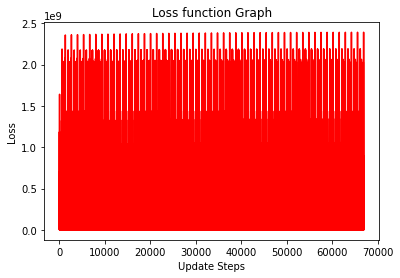

array([[-272.70622187],
       [ 195.73760842],
       [ 190.89103651],
       [ 320.75860951]])

In [13]:
gradient_descent(X, y_true, lr, epochs, MSE(), batch_size=1)

As we can observe, and especially because we're working with unnormalized data that are in severely different scales, SGD performs extremely poorly. Each instance of data tries to carry the the entirety of the weights towards optimizing for itself which creates a highly volatile, fluctuating pattern.

2. GD: performed by setting batch_size = len(X).

100%|██████████| 50/50 [00:00<00:00, 1486.34it/s]


Loss at the end of epoch 0: 321744500.1374766
Loss at the end of epoch 1: 302194424.9687324
Loss at the end of epoch 2: 284644957.63994026
Loss at the end of epoch 3: 268891370.1295904
Loss at the end of epoch 4: 254749884.83267555
Loss at the end of epoch 5: 242055530.64336103
Loss at the end of epoch 6: 230660218.43097818
Loss at the end of epoch 7: 220431013.45818308
Loss at the end of epoch 8: 211248584.587612
Loss at the end of epoch 9: 203005812.18575063
Loss at the end of epoch 10: 195606538.48406768
Loss at the end of epoch 11: 188964445.81934497
Loss at the end of epoch 12: 183002049.66695142
Loss at the end of epoch 13: 177649794.7199644
Loss at the end of epoch 14: 172845243.4691556
Loss at the end of epoch 15: 168532347.81795746
Loss at the end of epoch 16: 164660795.2351982
Loss at the end of epoch 17: 161185421.81793797
Loss at the end of epoch 18: 158065685.41729945
Loss at the end of epoch 19: 155265192.68087193
Loss at the end of epoch 20: 152751274.49424776
Loss at th

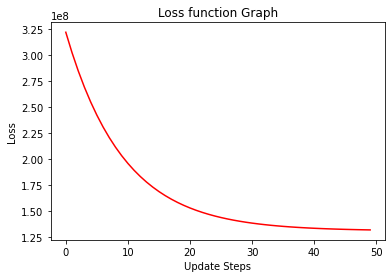

array([[  4.96745389],
       [202.4060737 ],
       [150.1972579 ],
       [  5.29466496]])

In [14]:
gradient_descent(X, y_true, lr, epochs, MSE(), batch_size=len(X))

As we observe, a much smoother curve of decreasing loss values appears in this plot because at each step we are taking the a step towards the expected globally optimal path and the loss value strictly decreases after each step. It performed faster than SGD and achieved a lower final loss value.

3. Mini Batch GD: performed by setting batch_size to an arbitrary number between 1 and len(X), for example 300.

100%|██████████| 50/50 [00:00<00:00, 972.45it/s]


Loss at the end of epoch 0: 284490703.31641245
Loss at the end of epoch 1: 232093359.25137356
Loss at the end of epoch 2: 200569246.56300417
Loss at the end of epoch 3: 181467019.8735674
Loss at the end of epoch 4: 169790436.10939646
Loss at the end of epoch 5: 162577847.2969472
Loss at the end of epoch 6: 158067609.42692226
Loss at the end of epoch 7: 155207285.86933407
Loss at the end of epoch 8: 153364682.93179542
Loss at the end of epoch 9: 152157456.25621855
Loss at the end of epoch 10: 151352436.05649027
Loss at the end of epoch 11: 150805993.6616667
Loss at the end of epoch 12: 150428603.7062253
Loss at the end of epoch 13: 150163698.0607769
Loss at the end of epoch 14: 149974982.31665272
Loss at the end of epoch 15: 149838778.97490898
Loss at the end of epoch 16: 149739368.41357267
Loss at the end of epoch 17: 149666126.65761438
Loss at the end of epoch 18: 149611746.8904267
Loss at the end of epoch 19: 149571119.6926697
Loss at the end of epoch 20: 149540617.4405992
Loss at th

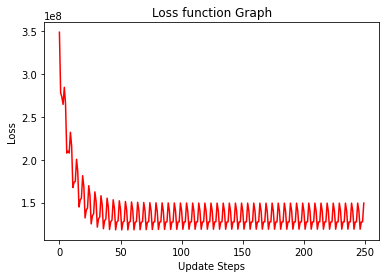

array([[  4.0763314 ],
       [217.63113148],
       [163.88324861],
       [  8.66839036]])

In [15]:
gradient_descent(X, y_true, lr, epochs, MSE(), batch_size=300)

Slight fluctations still occur for the same reason as discussed in the SGD section, however this algorithm converges to a very close loss value to GD, in comparable time and yet consumes only a fraction of the space complexity while maintaining a good time complexity as it still 
leverages vectorization.

It is worth noting that although the time complexity of the GD algorithm is calculable in amortized analysis at best due to its random nature, it is expected that mini batch GD will run faster than full batch GD given a big a enough dataset while still converging to roughly the same results.

###c. Special Cases on MAE
We will run the same analysis using MAE and batch_size = 1. (We modify the lr and number of epochs due to the nature of MAE vs. MSE).

First, a proof of concept to show that the algorithm does in fact work (note that this loss value is incomparable to the MSE loss due to different scalings):

 21%|██        | 206/1000 [00:00<00:00, 1042.84it/s]

Loss at the end of epoch 0: 13194.009850450338
Loss at the end of epoch 1: 13169.21351451434
Loss at the end of epoch 2: 13144.417178578344
Loss at the end of epoch 3: 13119.620842642342
Loss at the end of epoch 4: 13094.824506706342
Loss at the end of epoch 5: 13070.028170770345
Loss at the end of epoch 6: 13045.231834834347
Loss at the end of epoch 7: 13020.435498898347
Loss at the end of epoch 8: 12995.639162962349
Loss at the end of epoch 9: 12970.84282702635
Loss at the end of epoch 10: 12946.046491090354
Loss at the end of epoch 11: 12921.250155154352
Loss at the end of epoch 12: 12896.453819218352
Loss at the end of epoch 13: 12871.657483282353
Loss at the end of epoch 14: 12846.861147346353
Loss at the end of epoch 15: 12822.064811410357
Loss at the end of epoch 16: 12797.268475474359
Loss at the end of epoch 17: 12772.472139538359
Loss at the end of epoch 18: 12747.67580360236
Loss at the end of epoch 19: 12722.87946766636
Loss at the end of epoch 20: 12698.083131730362
Loss a

 34%|███▍      | 341/1000 [00:00<00:00, 1153.51it/s]

Loss at the end of epoch 206: 8928.722932322502
Loss at the end of epoch 207: 8915.676497248576
Loss at the end of epoch 208: 8902.694277723322
Loss at the end of epoch 209: 8889.737561512522
Loss at the end of epoch 210: 8876.829413921061
Loss at the end of epoch 211: 8864.084865867624
Loss at the end of epoch 212: 8851.424707048733
Loss at the end of epoch 213: 8838.842693117516
Loss at the end of epoch 214: 8826.314061968318
Loss at the end of epoch 215: 8813.869027456425
Loss at the end of epoch 216: 8801.563410517027
Loss at the end of epoch 217: 8789.348734396062
Loss at the end of epoch 218: 8777.226856454903
Loss at the end of epoch 219: 8765.15911057371
Loss at the end of epoch 220: 8753.133619279259
Loss at the end of epoch 221: 8741.195713508943
Loss at the end of epoch 222: 8729.328828895672
Loss at the end of epoch 223: 8717.55086800826
Loss at the end of epoch 224: 8705.94926837443
Loss at the end of epoch 225: 8694.388938868273
Loss at the end of epoch 226: 8682.89340416

 60%|█████▉    | 595/1000 [00:00<00:00, 1206.70it/s]

Loss at the end of epoch 466: 7436.266101907847
Loss at the end of epoch 467: 7434.973614501365
Loss at the end of epoch 468: 7433.696105882499
Loss at the end of epoch 469: 7432.425582121286
Loss at the end of epoch 470: 7431.163185183822
Loss at the end of epoch 471: 7429.90944924342
Loss at the end of epoch 472: 7428.694320085573
Loss at the end of epoch 473: 7427.489892515138
Loss at the end of epoch 474: 7426.285464944702
Loss at the end of epoch 475: 7425.081037374266
Loss at the end of epoch 476: 7423.876609803831
Loss at the end of epoch 477: 7422.684176723659
Loss at the end of epoch 478: 7421.519490934147
Loss at the end of epoch 479: 7420.365997510288
Loss at the end of epoch 480: 7419.232152278045
Loss at the end of epoch 481: 7418.098307045801
Loss at the end of epoch 482: 7416.9687721161645
Loss at the end of epoch 483: 7415.851423199486
Loss at the end of epoch 484: 7414.734074282806
Loss at the end of epoch 485: 7413.616725366125
Loss at the end of epoch 486: 7412.49937

 83%|████████▎ | 834/1000 [00:00<00:00, 1115.88it/s]

Loss at the end of epoch 711: 7303.190323739178
Loss at the end of epoch 712: 7302.96357279375
Loss at the end of epoch 713: 7302.740495706943
Loss at the end of epoch 714: 7302.518297592133
Loss at the end of epoch 715: 7302.300892605575
Loss at the end of epoch 716: 7302.083487619018
Loss at the end of epoch 717: 7301.8660826324585
Loss at the end of epoch 718: 7301.6486776459
Loss at the end of epoch 719: 7301.4312726593425
Loss at the end of epoch 720: 7301.213867672783
Loss at the end of epoch 721: 7300.996462686224
Loss at the end of epoch 722: 7300.779057699667
Loss at the end of epoch 723: 7300.561652713109
Loss at the end of epoch 724: 7300.344247726551
Loss at the end of epoch 725: 7300.126842739992
Loss at the end of epoch 726: 7299.909437753433
Loss at the end of epoch 727: 7299.692032766875
Loss at the end of epoch 728: 7299.477555793681
Loss at the end of epoch 729: 7299.26981819734
Loss at the end of epoch 730: 7299.062080600999
Loss at the end of epoch 731: 7298.8543430

100%|██████████| 1000/1000 [00:00<00:00, 1132.31it/s]


Loss at the end of epoch 944: 7266.605689645989
Loss at the end of epoch 945: 7266.471503053562
Loss at the end of epoch 946: 7266.3373164611385
Loss at the end of epoch 947: 7266.2031298687125
Loss at the end of epoch 948: 7266.068943276286
Loss at the end of epoch 949: 7265.9347566838605
Loss at the end of epoch 950: 7265.8005700914355
Loss at the end of epoch 951: 7265.6663834990095
Loss at the end of epoch 952: 7265.532196906584
Loss at the end of epoch 953: 7265.398010314159
Loss at the end of epoch 954: 7265.263823721733
Loss at the end of epoch 955: 7265.129637129308
Loss at the end of epoch 956: 7264.995450536883
Loss at the end of epoch 957: 7264.861263944457
Loss at the end of epoch 958: 7264.72707735203
Loss at the end of epoch 959: 7264.592890759607
Loss at the end of epoch 960: 7264.459210094991
Loss at the end of epoch 961: 7264.326340176069
Loss at the end of epoch 962: 7264.193470257146
Loss at the end of epoch 963: 7264.060600338225
Loss at the end of epoch 964: 7263.9

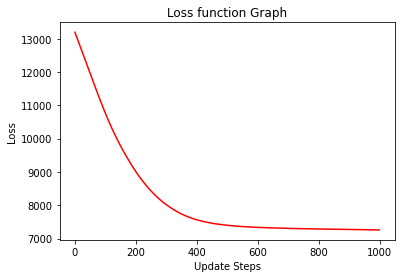

array([[  3.27757953],
       [156.51374845],
       [ 73.06112182],
       [  5.09607692]])

In [16]:
gradient_descent(X, y_true, 0.01, 1000, MAE(), batch_size=len(X))

Now we will run the algorithm using batch_size = 1 and with fewer epochs.

 40%|████      | 2/5 [00:00<00:00,  5.07it/s]

Loss at the end of epoch 0: 17391.761175859043
Loss at the end of epoch 1: 17241.035089359033


 60%|██████    | 3/5 [00:00<00:00,  5.91it/s]

Loss at the end of epoch 2: 17021.123048859015
Loss at the end of epoch 3: 16596.278932358997


100%|██████████| 5/5 [00:00<00:00,  5.36it/s]


Loss at the end of epoch 4: 16409.443193858962
Gradient Descent with batch size: 1 and learning rate: 0.01 finished 5 epochs in 0.9477450509999983 seconds.


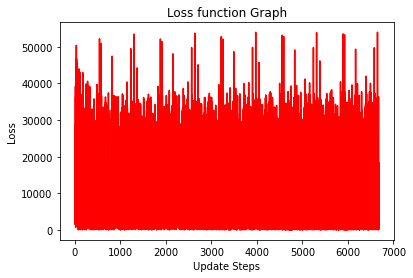

array([[ -2.79862261],
       [236.7259093 ],
       [-57.09989988],
       [ 12.29310437]])

In [17]:
# create an instance and pass it to the function
# the class is stateful and will keep the number
# of occurences of the |.| == 0 special case.
mae = MAE()
gradient_descent(X, y_true, 0.01, 5, mae, batch_size=1)

As expected the result is unsatisfactory (much like with MSE at batch_size = 1) but the objective was to see if we do indeed encounter few special cases:

In [18]:
mae.sc

0

As we can see, we did not encounter a single special case throughout the training process for $5\times len(X)$ update steps.

If we would have encountered any, as explained previously, we would set the coefficient with respect to that particular instance of the dataset to zero (which is the mean of the left and right subgradients and thereby a valid choice mathematically) because the model is a perfect fit on it. However, a "perfect fit" in the mathematical sense of the word happens extremely rarely as there will almost always be a margin of error, even if very small.

###d. Divergence for big learning rates
We will run an experiment to show that the algorithm will not converge for a big enough learning rate.

We set $lr = 0.1$ (as opposed to the original $0.00001$) and run the algorithm at full batch. We expect to see a sharp dip in loss for the first couple of epochs as the initial guess is likely very far off from actual optimal values but then it will increase over time.

100%|██████████| 50/50 [00:00<00:00, 1799.84it/s]


Loss at the end of epoch 0: 321749952.3838723
Loss at the end of epoch 1: 52552554420420.086
Loss at the end of epoch 2: 1.4455561463515124e+19
Loss at the end of epoch 3: 3.9762823795136363e+24
Loss at the end of epoch 4: 1.0937535427547344e+30
Loss at the end of epoch 5: 3.008581127065141e+35
Loss at the end of epoch 6: 8.275685558316204e+40
Loss at the end of epoch 7: 2.2763877245661062e+46
Loss at the end of epoch 8: 6.261645680034253e+51
Loss at the end of epoch 9: 1.7223870169026234e+57
Loss at the end of epoch 10: 4.737759348878533e+62
Loss at the end of epoch 11: 1.3032125432675028e+68
Loss at the end of epoch 12: 3.584738708460925e+73
Loss at the end of epoch 13: 9.860518665450266e+78
Loss at the end of epoch 14: 2.712326790295902e+84
Loss at the end of epoch 15: 7.46078058057298e+89
Loss at the end of epoch 16: 2.052232314727173e+95
Loss at the end of epoch 17: 5.645062776108343e+100
Loss at the end of epoch 18: 1.5527839376430652e+106
Loss at the end of epoch 19: 4.271233204

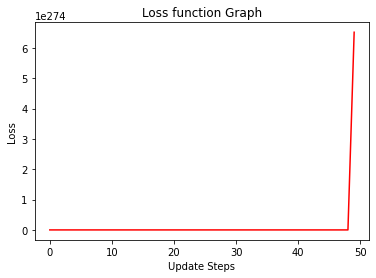

array([[-4.94715697e+136],
       [-2.10304451e+138],
       [-1.54632729e+138],
       [-5.48280966e+136]])

In [19]:
gradient_descent(X, y_true, 0.1, epochs, MSE(), batch_size=len(X))

As we can see in just 50 epochs we have reached a loss value in the order of $10^{274}$.

###e. Slow convergences for small learning rate
We will show that by setting $lr$ to a smaller value, we will convergence will take more time.

In order to prove this, we will repeat an exact experiment from section (a. and b.) only with a change in $lr$ and compare the final loss values.

We will use the full batch version with one-tenth of the original learning rate and we recall that from the results the final loss value at the 50th epoch was $131668765.70466661$.

100%|██████████| 50/50 [00:00<00:00, 1977.64it/s]


Loss at the end of epoch 0: 324293971.493892
Loss at the end of epoch 1: 322264793.8391664
Loss at the end of epoch 2: 320256885.5186305
Loss at the end of epoch 3: 318270023.5914154
Loss at the end of epoch 4: 316303987.4534737
Loss at the end of epoch 5: 314358558.8130854
Loss at the end of epoch 6: 312433521.66662025
Loss at the end of epoch 7: 310528662.2745552
Loss at the end of epoch 8: 308643769.1377417
Loss at the end of epoch 9: 306778632.973923
Loss at the end of epoch 10: 304933046.69449705
Loss at the end of epoch 11: 303106805.3815229
Loss at the end of epoch 12: 301299706.2649684
Loss at the end of epoch 13: 299511548.70019627
Loss at the end of epoch 14: 297742134.1456861
Loss at the end of epoch 15: 295991266.1409898
Loss at the end of epoch 16: 294258750.28491825
Loss at the end of epoch 17: 292544394.2139569
Loss at the end of epoch 18: 290848007.5809068
Loss at the end of epoch 19: 289169402.0337502
Loss at the end of epoch 20: 287508391.19473726
Loss at the end of e

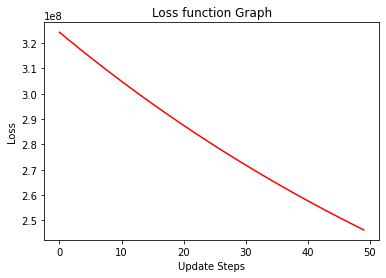

array([[-1.09627887],
       [50.48141967],
       [35.57693171],
       [ 0.40217943]])

In [20]:
gradient_descent(X, y_true, lr/10, epochs, MSE(), batch_size=len(X))

As we can see from the graph and from the final loss value, convergence happens much slower. We have arrived at $244867180.99481207$ after 50 epochs which is almost twice as much as the original loss value.

###f. Normalization
Here, we will first normalize our data and then feed it into algorithm. Because the data are different scales we expect much faster and more stable convergences.

We will repeat the exact same experiment with SGD as done in section (a. and b.) in order to get a fair comparsion.

In [21]:
dataset_norm = (dataset - np.mean(dataset, axis=0))/np.std(dataset, axis=0)
X = dataset_norm[:,:3]
y_true = dataset_norm[:,3]

  2%|▏         | 1/50 [00:00<00:05,  9.55it/s]

Loss at the end of epoch 0: 0.1014321479608564
Loss at the end of epoch 1: 0.10909604916934919


  8%|▊         | 4/50 [00:00<00:05,  8.44it/s]

Loss at the end of epoch 2: 0.11692472110840768
Loss at the end of epoch 3: 0.12490685088919236


 14%|█▍        | 7/50 [00:00<00:04, 10.42it/s]

Loss at the end of epoch 4: 0.13303140735818975
Loss at the end of epoch 5: 0.14128764567266394
Loss at the end of epoch 6: 0.149665110887514


 18%|█▊        | 9/50 [00:00<00:04, 10.14it/s]

Loss at the end of epoch 7: 0.158153640622431
Loss at the end of epoch 8: 0.16674336687503588
Loss at the end of epoch 9: 0.17542471704257948


 26%|██▌       | 13/50 [00:01<00:03, 10.79it/s]

Loss at the end of epoch 10: 0.18418841421178278
Loss at the end of epoch 11: 0.19302547677335213
Loss at the end of epoch 12: 0.20192721741497677


 30%|███       | 15/50 [00:01<00:03, 10.95it/s]

Loss at the end of epoch 13: 0.2108852415436932
Loss at the end of epoch 14: 0.21989144518590648
Loss at the end of epoch 15: 0.22893801241069384


 38%|███▊      | 19/50 [00:01<00:02, 11.07it/s]

Loss at the end of epoch 16: 0.23801741231955753
Loss at the end of epoch 17: 0.24712239564331093
Loss at the end of epoch 18: 0.256245990984515


 42%|████▏     | 21/50 [00:02<00:02,  9.96it/s]

Loss at the end of epoch 19: 0.2653815007416015
Loss at the end of epoch 20: 0.2745224967486702


 46%|████▌     | 23/50 [00:02<00:02,  9.98it/s]

Loss at the end of epoch 21: 0.2836628156629309
Loss at the end of epoch 22: 0.2927965541297072
Loss at the end of epoch 23: 0.30191806375313796


 54%|█████▍    | 27/50 [00:02<00:02, 11.50it/s]

Loss at the end of epoch 24: 0.3110219458987924
Loss at the end of epoch 25: 0.32010304635279196
Loss at the end of epoch 26: 0.32915644986032583


 58%|█████▊    | 29/50 [00:02<00:01, 11.40it/s]

Loss at the end of epoch 27: 0.338177474564922
Loss at the end of epoch 28: 0.3471616663683139
Loss at the end of epoch 29: 0.35610479322937294


 62%|██████▏   | 31/50 [00:02<00:01, 10.51it/s]

Loss at the end of epoch 30: 0.365002839419183
Loss at the end of epoch 31: 0.3738519997480988


 70%|███████   | 35/50 [00:03<00:01, 10.70it/s]

Loss at the end of epoch 32: 0.3826486737793983
Loss at the end of epoch 33: 0.3913894600430069
Loss at the end of epoch 34: 0.400071150261695


 74%|███████▍  | 37/50 [00:03<00:01, 10.44it/s]

Loss at the end of epoch 35: 0.4086907236010958
Loss at the end of epoch 36: 0.41724534095396837
Loss at the end of epoch 37: 0.4257323392681941


 82%|████████▏ | 41/50 [00:03<00:00, 10.14it/s]

Loss at the end of epoch 38: 0.43414922592712807
Loss at the end of epoch 39: 0.44249367319014715
Loss at the end of epoch 40: 0.45076351270044884


 86%|████████▌ | 43/50 [00:04<00:00, 10.07it/s]

Loss at the end of epoch 41: 0.45895673006646825
Loss at the end of epoch 42: 0.46707145952256945
Loss at the end of epoch 43: 0.47510597867408294


 90%|█████████ | 45/50 [00:04<00:00, 10.17it/s]

Loss at the end of epoch 44: 0.4830587033311593
Loss at the end of epoch 45: 0.49092818243532677


 96%|█████████▌| 48/50 [00:04<00:00,  9.50it/s]

Loss at the end of epoch 46: 0.49871309308218825
Loss at the end of epoch 47: 0.506412235643147
Loss at the end of epoch 48: 0.5140245289886558


100%|██████████| 50/50 [00:04<00:00, 10.13it/s]

Loss at the end of epoch 49: 0.521549005815035
Gradient Descent with batch size: 1 and learning rate: 1e-05 finished 50 epochs in 4.945859815999995 seconds.


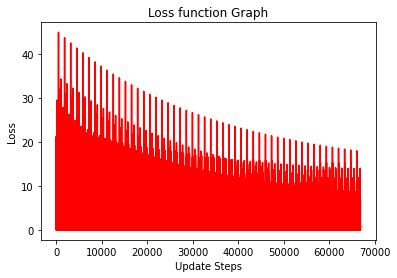

array([[ 0.1858373 ],
       [ 0.1926161 ],
       [-0.18066636],
       [-0.06272317]])

In [22]:
gradient_descent(X, y_true, lr, epochs, MSE(), batch_size=1)

There are less fluctuations and we can overall see a downward trend which means convergence can in fact happen. A learning rate decay scheme could probably help with a more stable convergence after normalization.

#Problem 3

Since we will need to repeat the same task over the next couple of sections we will first define a function that will a set of X's to their respective y's and then plot and report the MSE loss on all datasets.

In [23]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
def linreg_fit(X, y, regularization=False):
  # NOTE: Same scaler must be used for all splits
  # Remember that we have never seen validation or test datasets before.
  scaler = MinMaxScaler()
  scaler.fit(X['train'])
  # scale and augment for bias term
  # NOTE: We do not scale the bias terms because that defeats its own purpose
  X_trans = {
      'train': np.hstack([np.ones([len(X['train']), 1]), scaler.transform(X['train'])]),
      'val': np.hstack([np.ones([len(X['val']), 1]), scaler.transform(X['val'])]),
      'test': np.hstack([np.ones([len(X['test']), 1]), scaler.transform(X['test'])]),
  }
  # create the regressor object
  if not regularization:
    regressor = linear_model.LinearRegression()
  else:
    # in this case (regularization required) we will use Ridge Regression instead
    # https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification
    # we will first auto-tune the alpha hyper parameter of Ridge Regression
    # in order to do so, we will test log scale equidistant values between 1e-4 and 1e+4 for alpha
    # and obtain the MSE of the regressor on the validation dataset.
    # alpha that leads to the least MSE is chosen as best and the final regressor
    # is built upon it.
    alpha_list = np.logspace(-4, 4, 1000)
    alpha_best = alpha_list[0]
    mse_best = np.Inf
    print('Optimizing alpha for Ridge Regression.')
    for alpha in alpha_list:
      temp_regressor = linear_model.Ridge(alpha=alpha)
      temp_regressor.fit(X_trans['train'], y['train']/1000)
      temp_y_pred = 1000*temp_regressor.predict(X_trans['val'])
      mse = mean_squared_error(temp_y_pred, y['val'])
      if mse < mse_best:
        alpha_best = alpha
        mse_best = mse
    print(f'Optimization complete. Compiling model with alpha = {alpha_best}')
    regressor = linear_model.Ridge(alpha=alpha_best)

  # fit the regressor on to the data  
  regressor.fit(X_trans['train'], y['train']/1000)
  print(f"Regressor score: {regressor.score(X_trans['train'], y['train']/1000)}")
  print(f'Final coefficients of the regressor: {regressor.coef_}')
  # perform prediction
  y_pred = {
      'train': 1000*regressor.predict(X_trans['train']),
      'val': 1000*regressor.predict(X_trans['val']),
      'test': 1000*regressor.predict(X_trans['test'])
  }

  # metrics and plots
  print('Report of MSEs on each split:')
  print(f"\tMSE(train): {mean_squared_error(y_pred['train'], y['train'])}")
  print(f"\tMSE(val): {mean_squared_error(y_pred['val'], y['val'])}")
  print(f"\tMSE(test): {mean_squared_error(y_pred['test'], y['test'])}")

  plt.subplot(1, 3, 1)
  plt.scatter(X['train'][:, 0], y['train'], color='green')
  plt.plot(X['train'][:, 0], y_pred['train'], color='red')
  plt.title('Train data')

  plt.subplot(1, 3, 2)
  plt.scatter(X['val'][:, 0], y['val'], color='green')
  plt.plot(X['val'][:, 0], y_pred['val'], color='red')
  plt.title('Validation data')

  plt.subplot(1, 3, 3)
  plt.scatter(X['test'][:, 0], y['test'], color='green')
  plt.plot(X['test'][:, 0], y_pred['test'], color='red')
  plt.title('Test data')

  plt.tight_layout()
  plt.show()

###a. First degree Linear Regressor
We will fit a linear regressor on all splits of data, report MSE and plot the data as well as the best fit.

Regressor score: 0.6120093485411349
Final coefficients of the regressor: [[0.         7.22435295]]
Report of MSEs on each split:
	MSE(train): 3326099.2006335096
	MSE(val): 4072155.272586913
	MSE(test): 4223916.931048354


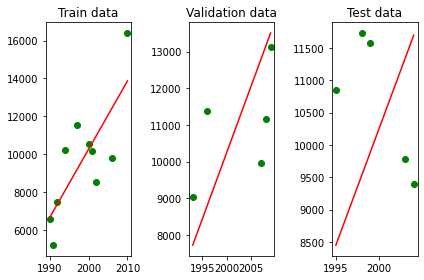

In [24]:
# read in all of the data and sort them by year
train = np.loadtxt('data/data3/data3_train.csv', delimiter=',')
train = train[train[:, 0].argsort()]
val = np.loadtxt('data/data3/data3_validation.csv', delimiter=',')
val = val[val[:, 0].argsort()]
test = np.loadtxt('data/data3/data3_test.csv', delimiter=',')
test = test[test[:, 0].argsort()]
X = {
    'train': train[:, 0].reshape(-1, 1),
    'val': val[:, 0].reshape(-1, 1),
    'test': test[:, 0].reshape(-1, 1)
}
y = {
    'train': train[:, 1].reshape(-1, 1),
    'val': val[:, 1].reshape(-1, 1),
    'test': test[:, 1].reshape(-1, 1)
}
linreg_fit(X, y)

As expected, least amount of MSE has been achieved on the train data because we fit our regressor on this data and tested it on the other data. However because we have extremely few data points, the regressor fails to generalize well enough for test data. Additionally, a linear function does not seem to be a great fit for this data.

###b. Higher degree regressors
This time we will add higher order features to the model and try to build a more complicated regressor that will hopefully better fit the data. Keeping in mind that higher we go, the more we trade bias for variance and we will eventually pivot from underfitting to overfitting.

Regressor score: 0.6205517319189764
Final coefficients of the regressor: [[   0.         -569.49112373  576.90425106]]
Report of MSEs on each split:
	MSE(train): 3252868.532786977
	MSE(val): 4741270.094572956
	MSE(test): 4626115.598444338


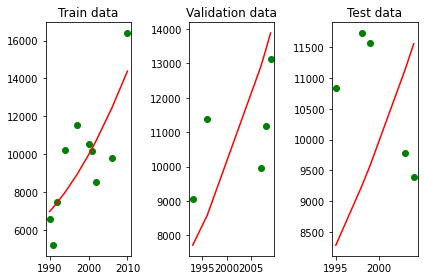

Regressor score: 0.8993669494928871
Final coefficients of the regressor: [[       0.          2118692.14389196 -4237819.29664432  2119138.46934747]]
Report of MSEs on each split:
	MSE(train): 862689.6230372349
	MSE(val): 751722.7876546305
	MSE(test): 655083.1427114925


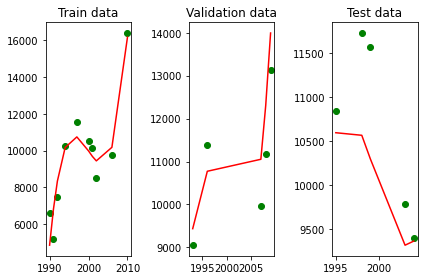

Regressor score: 0.9322286897058653
Final coefficients of the regressor: [[ 0.00000000e+00 -3.62721569e+08  1.09040305e+09 -1.09264638e+09
   3.64964914e+08]]
Report of MSEs on each split:
	MSE(train): 580978.1760143915
	MSE(val): 121591.46564330005
	MSE(test): 416169.1736135242


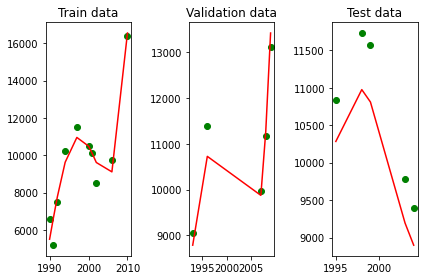

Regressor score: 0.97698680056178
Final coefficients of the regressor: [[ 0.00000000e+00 -2.50362532e+11  1.00119848e+12 -1.50142572e+12
   1.00070612e+12 -2.50116352e+11]]
Report of MSEs on each split:
	MSE(train): 197283.57878642905
	MSE(val): 1796952.0842095376
	MSE(test): 638208.0944166507


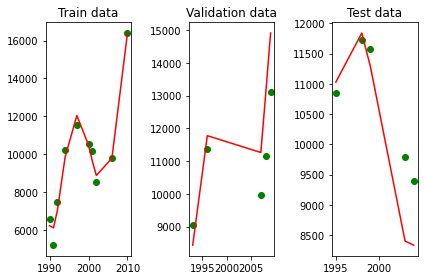

Regressor score: 0.9809746173110969
Final coefficients of the regressor: [[ 0.00000000e+00  7.40751242e+12 -3.72929949e+13  7.50969505e+13
  -7.56080117e+13  3.80595894e+13 -7.66304577e+12]]
Report of MSEs on each split:
	MSE(train): 163097.51256987677
	MSE(val): 2182204.312958765
	MSE(test): 870005.0241090981


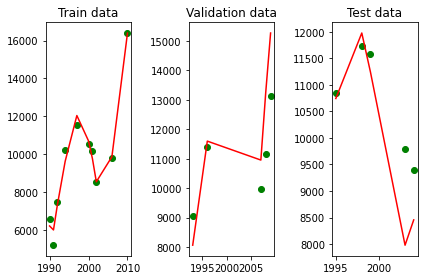

Regressor score: 0.9808580727931875
Final coefficients of the regressor: [[ 0.00000000e+00  7.88156650e+12 -3.85498701e+13  7.42657340e+13
  -6.91953746e+13  2.92669177e+13 -2.55069600e+12 -1.11827746e+12]]
Report of MSEs on each split:
	MSE(train): 164096.60527069197
	MSE(val): 2296251.7476593973
	MSE(test): 919287.9902977673


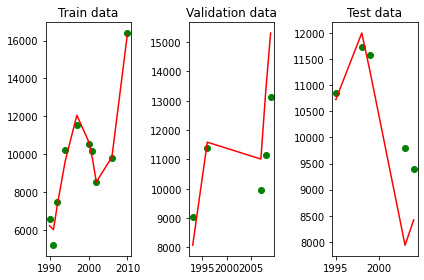

Regressor score: 0.9999078824219243
Final coefficients of the regressor: [[ 0.00000000e+00 -1.07331662e+13 -2.89502558e+13  2.39597472e+14
  -3.88047040e+14  1.10869354e+14  2.59349788e+14 -2.48273142e+14
   6.61869887e+13]]
Report of MSEs on each split:
	MSE(train): 789.6896527016627
	MSE(val): 2212851.899091579
	MSE(test): 1010733.3847902503


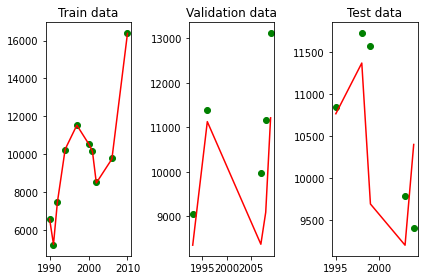

Regressor score: 0.999722717450094
Final coefficients of the regressor: [[ 0.00000000e+00 -2.32490488e+12 -6.42088492e+13  2.81618915e+14
  -3.89685879e+14  1.34270222e+14  1.04892743e+14 -3.42413161e+13
  -5.64993944e+13  2.61784638e+13]]
Report of MSEs on each split:
	MSE(train): 2377.039921256345
	MSE(val): 4226389.011200954
	MSE(test): 1331129.3343630042


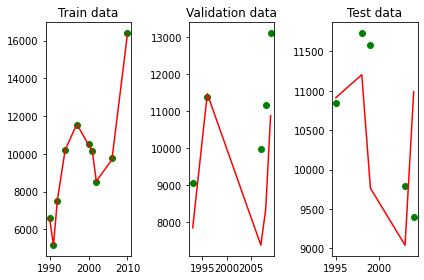

Regressor score: 0.9999237395496091
Final coefficients of the regressor: [[-1.09063340e+13 -5.74204698e+12 -4.11029235e+13  2.31798193e+14
  -3.48923802e+14  1.01052628e+14  2.16361072e+14 -2.26345080e+14
   9.40330496e+13 -2.82810171e+13  7.14992687e+12]]
Report of MSEs on each split:
	MSE(train): 653.7524090625186
	MSE(val): 1708005.1895703108
	MSE(test): 945435.6562285151


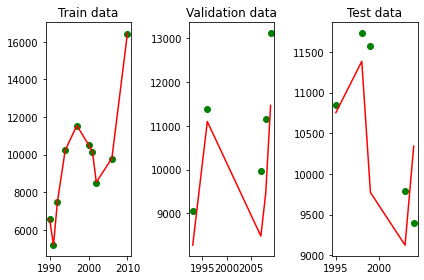

In [25]:
for order in range(2, 11):
  X['train'] = np.hstack([X['train'], (X['train'][:, 0]**order).reshape(-1, 1)])
  X['val'] = np.hstack([X['val'], (X['val'][:, 0]**order).reshape(-1, 1)])
  X['test'] = np.hstack([X['test'], (X['test'][:, 0]**order).reshape(-1, 1)])
  linreg_fit(X, y)

###c. Analysis
As we can see from the MSE values, by increasing the order of the highest degree term in the regression, MSE(train) consistently decreases to the point where it almost perfectly fits the train data on the last diagram. However, MSE(val) and MSE(test) only decrease until the addition of the $x^4$ term and then we can see the model overfitting on the train data. Therefore the models **lose bias** and **increase in variance** as we move up in the orders.

###d. Regularization
We will employ Ridge Regression to see if we can get a good fit even with terms up to $x^{10}$.

Optimizing alpha for Ridge Regression.
Optimization complete. Compiling model with alpha = 11.299339380332217
Regressor score: 0.44083084898979374
Final coefficients of the regressor: [[0.         0.34036605 0.34036403 0.34036238 0.34036111 0.34036021
  0.34035968 0.34035953 0.34035975 0.34036035 0.34036132]]
Report of MSEs on each split:
	MSE(train): 4793548.65690919
	MSE(val): 1752087.5335610216
	MSE(test): 2594099.187577975


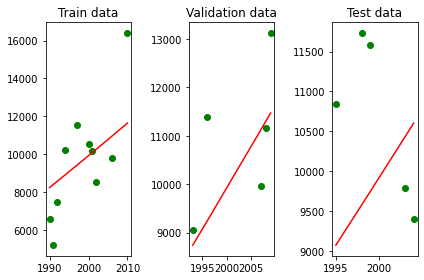

In [26]:
# remember that X from section b. contains all terms from x^0 to x^10
# because at each step we kept building on the currect X and added higher
# order terms to it
linreg_fit(X, y, regularization=True)

The higher order features are orders of magnitude more significant than lower order features so the same regularization term for every feature up $x^{10}$ performs better than the first and the second model but is much worse than the third model. 

In order words, minimizing all of the feature weights to near 0 does not work well for this model. We need weights for the higher order features to be more severely penalized.

It may be theoretically possible run PCA on the augmented feature list and use regularization on the reduced dataset to get a better result but that is outside the scope of this problem.

#Problem 4

###a. Plotting all splits of the dataset


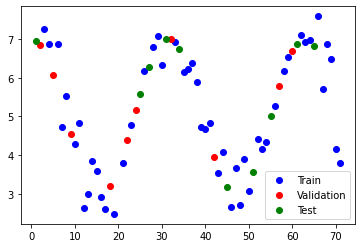

In [27]:
# read in all of the data and sort them by month
train = np.loadtxt('data/data4/data4_train.csv', delimiter=',')
train = train[train[:, 0].argsort()]
val = np.loadtxt('data/data4/data4_validation.csv', delimiter=',')
val = val[val[:, 0].argsort()]
test = np.loadtxt('data/data4/data4_test.csv', delimiter=',')
test = test[test[:, 0].argsort()]
X = {
    'train': train[:, 0].reshape(-1, 1),
    'val': val[:, 0].reshape(-1, 1),
    'test': test[:, 0].reshape(-1, 1)
}
y = {
    'train': train[:, 1].reshape(-1, 1),
    'val': val[:, 1].reshape(-1, 1),
    'test': test[:, 1].reshape(-1, 1)
}

# scatter plot of the entire dataset in one 
plt.scatter(X['train'], y['train'], color='blue')
plt.scatter(X['val'], y['val'], color='red')
plt.scatter(X['test'], y['test'], color='green')
plt.legend(['Train', 'Validation', 'Test'])
plt.show()

The data appear to follow a sinusoidal pattern and therefore we will first use a cosine transform on the features (as suggested in the hint for this problem) to be able to fit a linear regressor.

If we assume that this data is generated from a cosine function we have:
$$ y = a cos(bx) + c\qquad(I)$$
If we transform the input features with a cosine function so that we have:
$$ \bar X = cos(bX)$$
Where $X$ contains the original input features. We can write $(I)$ as:
$$ y = a\bar X + c$$
This means that with this transform we can fit a linear regressor on the transformed space instead of trying to directly fit a cosine on the original data.

We will adopt the following modified function from Problem 3 for this problem. In this modified version we will set $b = \frac{1}{j}$ as per the problem statement's request.

In [28]:
def linreg_fit_cosine(X, y, j=1):
  # transform and augment for bias term
  # NOTE: We do not transform the bias terms because that defeats its own purpose
  # X_NEW = cos(X_OLD/j)
  X_trans = {
      'train': np.hstack([np.ones([len(X['train']), 1]), np.cos(X['train']/j)]),
      'val': np.hstack([np.ones([len(X['val']), 1]), np.cos(X['val']/j)]),
      'test': np.hstack([np.ones([len(X['test']), 1]), np.cos(X['test']/j)]),
  }
  
  # create the regressor object
  regressor = linear_model.LinearRegression()

  # fit the regressor on to the data  
  regressor.fit(X_trans['train'], y['train'])
  print(f'Final coefficients of the regressor: {regressor.coef_}')
  print(f"Regressor score: {regressor.score(X_trans['train'], y['train'])}")
  # perform prediction
  y_pred = {
      'train': regressor.predict(X_trans['train']),
      'val': regressor.predict(X_trans['val']),
      'test': regressor.predict(X_trans['test'])
  }

  # metrics and plots
  print('Report of MSEs on each split:')
  print(f"\tMSE(train): {mean_squared_error(y_pred['train'], y['train'])}")
  print(f"\tMSE(val): {mean_squared_error(y_pred['val'], y['val'])}")
  print(f"\tMSE(test): {mean_squared_error(y_pred['test'], y['test'])}")

  plt.subplot(1, 3, 1)
  plt.scatter(X['train'][:, 0], y['train'], color='green')
  plt.plot(X['train'][:, 0], y_pred['train'], color='red')
  plt.title('Train data')

  plt.subplot(1, 3, 2)
  plt.scatter(X['val'][:, 0], y['val'], color='green')
  plt.plot(X['val'][:, 0], y_pred['val'], color='red')
  plt.title('Validation data')

  plt.subplot(1, 3, 3)
  plt.scatter(X['test'][:, 0], y['test'], color='green')
  plt.plot(X['test'][:, 0], y_pred['test'], color='red')
  plt.title('Test data')

  plt.tight_layout()
  plt.show()

###b. Attempting to fit a cosine with j=1

Final coefficients of the regressor: [[ 0.         -0.03189758]]
Regressor score: 0.0002215518033841235
Report of MSEs on each split:
	MSE(train): 2.3277440098337014
	MSE(val): 1.6594905523557482
	MSE(test): 2.4020864649078297


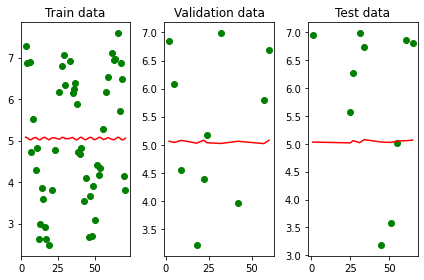

In [29]:
linreg_fit_cosine(X, y, j=1)

As we can see, we cannot achieve great results with $j=1$. The curve that is fit to the data is far from ideal.

###c. Tuning "j"
Here we will attempt to tune the hyperparameter "j" from last section in order to obtain a better fit to the data. As per the suggestion of the problem description itself we will use all values in range [1, 10] to see which of them results in the best fit.

Testing j=1
Final coefficients of the regressor: [[ 0.         -0.03189758]]
Regressor score: 0.0002215518033841235
Report of MSEs on each split:
	MSE(train): 2.3277440098337014
	MSE(val): 1.6594905523557482
	MSE(test): 2.4020864649078297


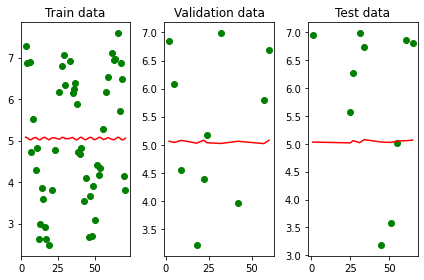

Testing j=2
Final coefficients of the regressor: [[ 0.         -0.05551628]]
Regressor score: 0.000643435105608936
Report of MSEs on each split:
	MSE(train): 2.3267617558839646
	MSE(val): 1.6591098815572363
	MSE(test): 2.446255149980014


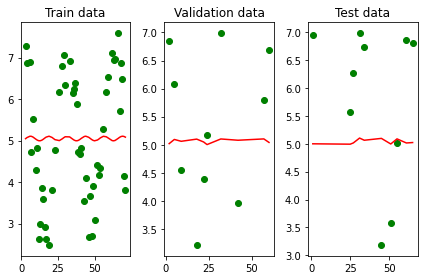

Testing j=3
Final coefficients of the regressor: [[ 0.         -0.15694609]]
Regressor score: 0.005232244261019314
Report of MSEs on each split:
	MSE(train): 2.316077815813998
	MSE(val): 1.6850397448926735
	MSE(test): 2.4500586520383125


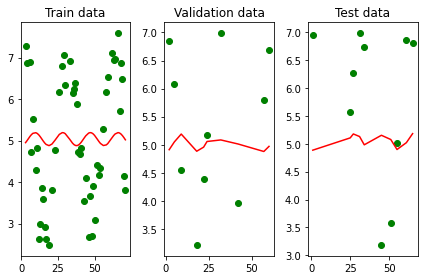

Testing j=4
Final coefficients of the regressor: [[ 0.         -0.30156716]]
Regressor score: 0.01867236268209116
Report of MSEs on each split:
	MSE(train): 2.2847857278493726
	MSE(val): 1.7854294523007823
	MSE(test): 2.388159625297593


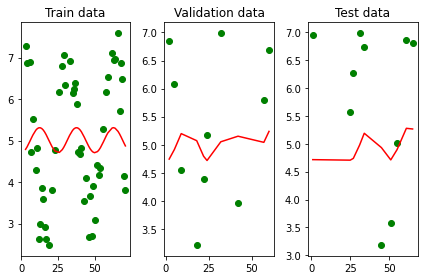

Testing j=5
Final coefficients of the regressor: [[0.         2.05582086]]
Regressor score: 0.8698875713974052
Report of MSEs on each split:
	MSE(train): 0.30293554220028857
	MSE(val): 0.009012453456621543
	MSE(test): 0.011749427917484628


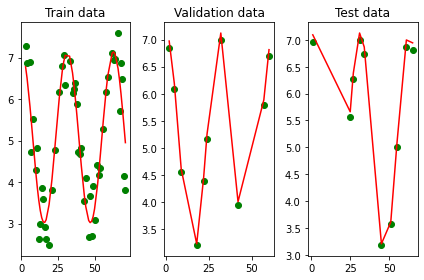

Testing j=6
Final coefficients of the regressor: [[0.         0.78117093]]
Regressor score: 0.1182670807858166
Report of MSEs on each split:
	MSE(train): 2.0529033454123478
	MSE(val): 1.5653508761848969
	MSE(test): 2.2850451168013253


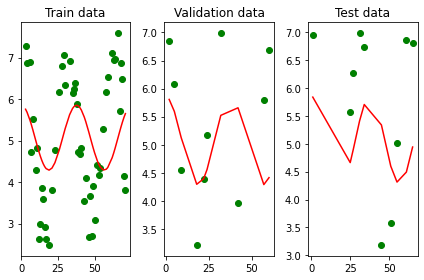

Testing j=7
Final coefficients of the regressor: [[ 0.         -0.41190568]]
Regressor score: 0.03643795281162232
Report of MSEs on each split:
	MSE(train): 2.2434228178168847
	MSE(val): 1.9139325105547418
	MSE(test): 2.074114276406795


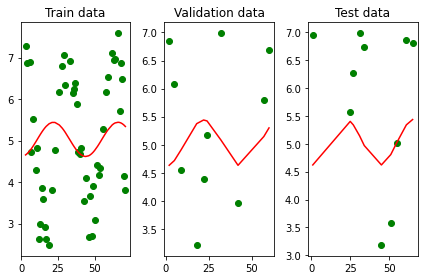

Testing j=8
Final coefficients of the regressor: [[ 0.         -0.44103515]]
Regressor score: 0.03572447919947708
Report of MSEs on each split:
	MSE(train): 2.2450839697749423
	MSE(val): 2.024163336500701
	MSE(test): 2.0453263264926758


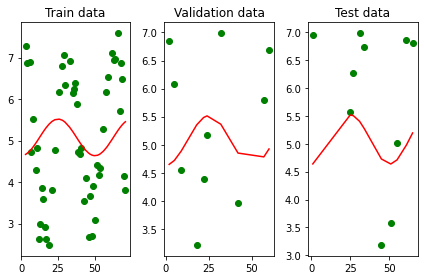

Testing j=9
Final coefficients of the regressor: [[ 0.         -0.02284021]]
Regressor score: 8.987684832340026e-05
Report of MSEs on each split:
	MSE(train): 2.328050583343503
	MSE(val): 1.6710052796547772
	MSE(test): 2.3989907351100186


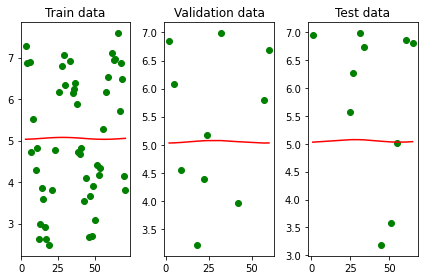

Testing j=10
Final coefficients of the regressor: [[0.         0.24414913]]
Regressor score: 0.012230105422158521
Report of MSEs on each split:
	MSE(train): 2.299784976706622
	MSE(val): 1.5193310980504227
	MSE(test): 2.4943529982942936


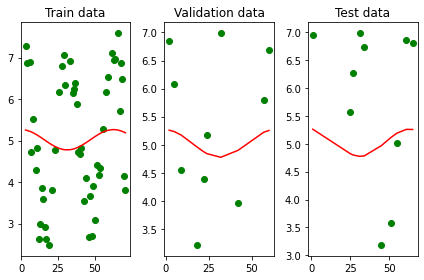

In [30]:
for j in range(1, 11):
  print(f'Testing j={j}')
  linreg_fit_cosine(X, y, j=j)

Judging by the R2 scores of the regressor, for $j=5$ we can see that we obtained a near perfect fit to our data.

It is not without its merits to also take a look at the transformed space for $j=5$ and confirm that this transform indeed will be a perfect fit for a linear regressor:


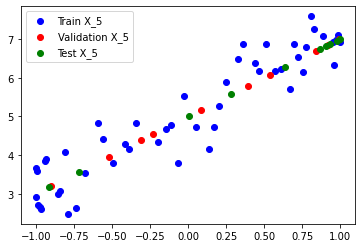

In [31]:
X_5 = {
    'train': np.cos(train[:, 0].reshape(-1, 1)/5),
    'val': np.cos(val[:, 0].reshape(-1, 1)/5),
    'test': np.cos(test[:, 0].reshape(-1, 1)/5)
}

# scatter plot of the entire dataset in one 
plt.scatter(X_5['train'], y['train'], color='blue')
plt.scatter(X_5['val'], y['val'], color='red')
plt.scatter(X_5['test'], y['test'], color='green')
plt.legend(['Train X_5', 'Validation X_5', 'Test X_5'])
plt.show()